In [2]:
import xgboost as xgb
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
train=pd.read_table('D:\game\zhengqi_train.txt')
y=train['target']
x=train.drop(['target'],axis=1,inplace=True)

##可以看出test 和train 是没有空缺值，因此不需要进行处理
test=pd.read_table('D:\game\zhengqi_test.txt')
#test.head()

def calculate_mse(y_predict,y_real):
    return np.mean((np.array(y_predict)-np.array(y_real))**2)

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,0.368,0.380,-0.225,-0.049,0.379,0.092,0.550,0.551,0.244,0.904,...,-0.449,0.047,0.057,-0.042,0.847,0.534,-0.009,-0.190,-0.567,0.388
1,0.148,0.489,-0.247,-0.049,0.122,-0.201,0.487,0.493,-0.127,0.904,...,-0.443,0.047,0.560,0.176,0.551,0.046,-0.220,0.008,-0.294,0.104
2,-0.166,-0.062,-0.311,0.046,-0.055,0.063,0.485,0.493,-0.227,0.904,...,-0.458,-0.398,0.101,0.199,0.634,0.017,-0.234,0.008,0.373,0.569
3,0.102,0.294,-0.259,0.051,-0.183,0.148,0.474,0.504,0.010,0.904,...,-0.456,-0.398,1.007,0.137,1.042,-0.040,-0.290,0.008,-0.666,0.391
4,0.300,0.428,0.208,0.051,-0.033,0.116,0.408,0.497,0.155,0.904,...,-0.458,-0.776,0.291,0.370,0.181,-0.040,-0.290,0.008,-0.140,-0.497


D:\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


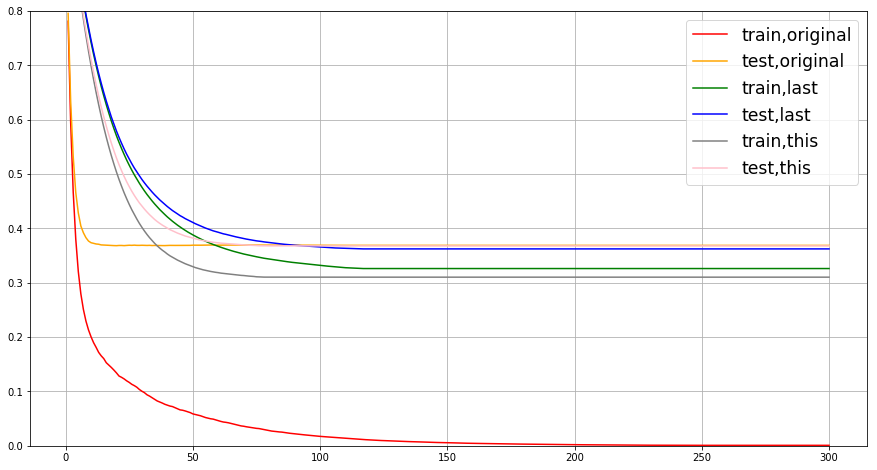

In [69]:
dfull = xgb.DMatrix(train,y)
param1 = {'silent':True
            ,'obj':'reg:linear'
            ,"subsample":1
            ,"max_depth":6  #调试出来max_depth=2是最好的
            ,"eta":0.3
            ,"gamma":0
            ,"lambda":1
            ,"alpha":0
            ,"colsample_bytree":1
            ,"colsample_bylevel":1
            ,"colsample_bynode":1
            ,"nfold":5}
num_round = 300
cvresult1 = xgb.cv(param1, dfull, num_round)
fig,ax = plt.subplots(1,figsize=(15,8))
ax.set_ylim(top=0.8)
ax.grid()
ax.plot(range(1,301),cvresult1.iloc[:,0],c="red",label="train,original")
ax.plot(range(1,301),cvresult1.iloc[:,2],c="orange",label="test,original")
param2 = {'silent':True
          ,'obj':'reg:linear'
          ,"max_depth":2
          ,'eta':0.05
          ,'gamma':2
          ,'lambda':1
           ,'alpha':0
          ,"colsample_bytree":1
          ,"colsample_bylevel":1
          ,"nfold":5}
param3 = {'silent':True
          ,'obj':'reg:linear'
          ,"max_depth":5
          ,"eta":0.05
          ,'gamma':2
          ,'lambda':1
          ,'alpha':0
          ,"colsample_bytree":1
          ,"colsample_bylevel":1
          ,"nfold":5}
#正则化参数 放到后面去调
#可不可以使用网格搜索
cvresult2 = xgb.cv(param2, dfull, num_round)
dfull2 = xgb.DMatrix(train_real,y)
cvresult3 = xgb.cv(param3, dfull2, num_round)
ax.plot(range(1,301),cvresult2.iloc[:,0],c="green",label="train,last")
ax.plot(range(1,301),cvresult2.iloc[:,2],c="blue",label="test,last")
ax.plot(range(1,301),cvresult3.iloc[:,0],c="gray",label="train,this")
ax.plot(range(1,301),cvresult3.iloc[:,2],c="pink",label="test,this")
ax.legend(fontsize="xx-large")
plt.show()
#上述条件速度更快


In [13]:
import pandas as pd
alldata=pd.concat([train,test],ignore_index=True)
print(train.shape)
print(test.shape)

(2888, 38)
(1925, 38)


In [38]:
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
xtrain,xtest,ytrain,ytest=train_test_split(train,y,test_size=0.3)

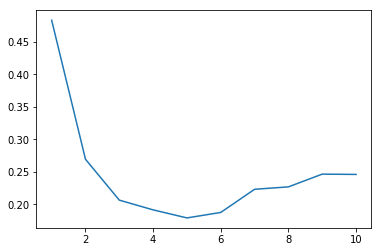

In [50]:
mse=[]
for i in range(10):
    clf = tree.DecisionTreeRegressor(max_depth=5)
    clf = clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest) #返回预测的准确度
    mse.append(calculate_mse(ypred,ytest))
plt.plot(range(1,11),mse)
plt.show()
print(mse.min)

In [63]:
clf = tree.DecisionTreeRegressor(max_depth=5)
clf = clf.fit(xtrain, ytrain)


In [64]:
[*zip(xtrain.columns,clf.feature_importances_)]

[('V0', 0.7500725336925181),
 ('V1', 0.14628541719081864),
 ('V2', 0.028237004537670682),
 ('V3', 0.014017692910806089),
 ('V4', 0.0020935226910191247),
 ('V5', 0.0),
 ('V6', 0.0),
 ('V7', 0.008968524099367197),
 ('V8', 0.03044480512549438),
 ('V9', 0.0),
 ('V10', 0.0),
 ('V11', 0.0),
 ('V12', 0.0),
 ('V13', 0.0),
 ('V14', 0.0),
 ('V15', 0.0),
 ('V16', 0.0),
 ('V17', 0.0),
 ('V18', 0.0),
 ('V19', 0.0),
 ('V20', 0.0),
 ('V21', 0.0015672176981043177),
 ('V22', 0.0),
 ('V23', 0.0018706985229106693),
 ('V24', 0.0),
 ('V25', 0.0017365683527793651),
 ('V26', 0.0),
 ('V27', 0.008399868071582939),
 ('V28', 0.0),
 ('V29', 0.0),
 ('V30', 0.0),
 ('V31', 0.005950097155529982),
 ('V32', 0.0),
 ('V33', 0.0003560499513984765),
 ('V34', 0.0),
 ('V35', 0.0),
 ('V36', 0.0),
 ('V37', 0.0)]

In [65]:
train_real=train.drop(['V5','V6','V9','V10','V11','V12'
                      ,'V13','V14','V15','V16','V17','V18'
                      ,'V19','V20','V22','V24','V26','V28'
                      ,'V29','V30','V32','V34','V35','V36'
                      ,'V37'],axis=1)


In [66]:
train_real.head()

,V0,V1,V2,V3,V4,V7,V8,V21,V23,V25,V27,V31,V33
0,0.566,0.016,-0.143,0.407,0.452,-2.360,-0.436,-0.400,0.356,-0.223,0.168,-0.615,-4.627
1,0.968,0.437,0.066,0.566,0.194,-2.360,0.332,-0.802,0.357,-0.144,0.338,0.032,-0.843
2,1.013,0.568,0.235,0.370,0.112,-2.360,0.396,-0.477,0.355,-0.067,0.326,0.277,-0.843
3,0.733,0.368,0.283,0.165,0.599,-2.086,0.403,-0.491,0.352,0.113,0.277,0.279,-0.843
4,0.684,0.638,0.260,0.209,0.337,-2.086,0.314,0.309,0.352,0.221,0.332,0.328,-0.843


In [67]:
train

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,-0.450,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,0.671,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,1.287,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,1.298,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,1.289,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028
5,0.445,0.627,0.408,0.220,0.458,-1.056,-1.009,-1.896,0.481,-2.114,...,1.296,0.454,0.674,0.358,0.618,-0.843,-0.290,0.364,-0.191,-0.883
6,0.889,0.416,0.640,0.356,0.224,-0.893,-0.812,-1.823,0.729,-2.114,...,2.150,0.454,0.081,0.243,0.468,-0.843,-0.290,0.364,-0.155,-1.318
7,0.984,0.529,0.704,0.438,0.258,-0.917,-0.682,-1.721,0.753,-2.114,...,2.153,0.139,-0.050,0.428,-0.119,-0.843,-0.290,0.364,0.100,-0.899
8,0.948,0.850,0.584,0.459,0.591,-0.523,-0.591,-1.524,0.763,-2.114,...,0.511,0.188,0.467,0.597,-0.057,-0.843,-0.290,0.364,0.053,-0.553
9,1.157,1.055,0.638,0.617,1.483,-0.731,-0.612,-1.524,0.968,-2.114,...,0.511,0.860,0.456,0.916,0.039,-0.843,-0.290,0.364,0.151,-1.157
